# Keras Primer
- Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow, CNTK or Theano
- Documentation: https://keras.io/

In [4]:
import keras
import numpy as np

## Import datasets
- Keras provides a few datasets that are useful for practising deep learning
- CIFAR10, CIFAR 100, IMDB, newswire, MNIST, and Boston Houseing
- https://keras.io/datasets/

In [3]:
from keras.datasets import boston_housing, mnist, cifar10, imdb

In [5]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

40960/57026 [====================>.........] - ETA: 0s

In [7]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


In [8]:
print(y_train.shape)
print(y_test.shape)

(404,)
(102,)


In [15]:
y_train[0]    # numerical target => regression problem

15.199999999999999

## MLP with Keras

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from sklearn.metrics import mean_squared_error

### Creating a model
- 13 (- 13 - 7) - 1 MLP model
- Without dropout

In [13]:
model = Sequential()
model.add(Dense(13, input_dim = x_train.shape[1], kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'normal'))

In [16]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.fit(x_train, y_train, batch_size = 30, epochs = 15, verbose = 1)

Epoch 1/15
404/404 [==============================] - 0s - loss: 574.0546     
Epoch 2/15
404/404 [==============================] - 0s - loss: 514.4108     
Epoch 3/15
404/404 [==============================] - 0s - loss: 374.9120     
Epoch 4/15
404/404 [==============================] - 0s - loss: 206.8741     
Epoch 5/15
404/404 [==============================] - 0s - loss: 144.8640     
Epoch 6/15
404/404 [==============================] - 0s - loss: 132.0330     
Epoch 7/15
404/404 [==============================] - 0s - loss: 119.9556     

In [30]:
y_pred = model.predict(x_test)

In [33]:
mean_squared_error(y_pred, y_test)    # regression error

71.334699111867309

## CNN with Keras - MNIST dataset
- Baseline model

### Import datasets

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers

import numpy as np

In [4]:
seed = 7
np.random.seed(seed)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


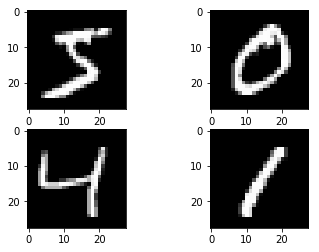

In [19]:
plt.subplot(221)
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
print(x_train[0])
print(x_test[0])

In [ ]:
from sklearn.preprocessing import minmax_scale

In [20]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

# normalizing inputs (0-1)
# x_train = x_train / 255
# x_test = x_test / 255

In [21]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [22]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [23]:
# 10 classes (0~9)
num_classes = 10

In [33]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1,1), input_shape = (28, 28, 1), padding = 'same', activation = 'sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])